### ML ASSIGNMENT 1 SET 3 QUESTION 2
#### WORK NEED TO DO AS FOLLOWING:
##### 1. Import the data dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/car/ (Links to an external site.)
##### 2. Extract X as all columns except the last column and Y as last column. 
##### 3. Visualize the dataset using any two appropriate graphs. 
##### 4. Visualize the correlation between all the variables of dataset. 
##### 5. Split the data into training set and testing set.Perform 10-fold cross validation.
##### 6. Train a Logistic regression model for the dataset.
##### 7. Compute the accuracy and confusion matrix.
##### 8. Predict and display the class label of a car with following attributes : buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med].

##### Importing all required libraries

In [168]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

##### 1. Import the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/car/   (Links ##### to an external site.)(Hint: Convert txt to csv for ease of use.)

In [169]:
# Reading data set from current directory
THIS_FOLDER=os.getcwd() #getting current working directory
print(THIS_FOLDER)
input_file = os.path.join(THIS_FOLDER, 'car_data.csv')
data=pd.read_csv(input_file)
data.head(20)

C:\Users\kdevanand\ML


,buying,maint,persons,doors,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


##### 2. Extract X as all columns except the first column and Y as first column. 

In [170]:
data.info()
data.shape
#Data definitionfor the string values
buying = {'low':0,'med':1,'high':2,'vhigh':3}
maint = {'low':0,'med':1,'high':2,'vhigh':3}
lug_boot = {'small':0,'med':1,'big':2 }
safety = {'low':0,'med':1,'high':2}
acceptability = {'unacc':0,'acc':1,'good':2,'vgood':3}
#Data converted to Numerical form for better processing
data['buying_a'] = [buying[item] for item in data.buying]
data['maint_a'] = [maint[item] for item in data.maint]
data.persons[data.persons == 'more'] = 6
data.doors[data.doors == 'more'] = 6
data['lug_boot_a'] = [lug_boot[item] for item in data.lug_boot]
data['safety_a'] = [safety[item] for item in data.safety]
data['acceptability_a'] = [acceptability[item] for item in data.acceptability]

data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   persons        1728 non-null   object
 3   doors          1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,persons,doors,lug_boot,safety,acceptability,buying_a,maint_a,lug_boot_a,safety_a,acceptability_a
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,0
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,1,0
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,2,0
3,vhigh,vhigh,2,2,med,low,unacc,3,3,1,0,0
4,vhigh,vhigh,2,2,med,med,unacc,3,3,1,1,0
5,vhigh,vhigh,2,2,med,high,unacc,3,3,1,2,0
6,vhigh,vhigh,2,2,big,low,unacc,3,3,2,0,0
7,vhigh,vhigh,2,2,big,med,unacc,3,3,2,1,0
8,vhigh,vhigh,2,2,big,high,unacc,3,3,2,2,0
9,vhigh,vhigh,2,4,small,low,unacc,3,3,0,0,0


In [171]:
x = np.array(data['maint_a']).reshape((-1,1))
print("MAINTENANCE ARRAY : ",x)
y = np.array(data['acceptability_a'])
print("\nACCEPTABILITY ARRAY : ",y)

MAINTENANCE ARRAY :  [[3]
 [3]
 [3]
 ...
 [0]
 [0]
 [0]]

ACCEPTABILITY ARRAY :  [0 0 0 ... 0 2 3]


##### 3. Visualize the dataset. 

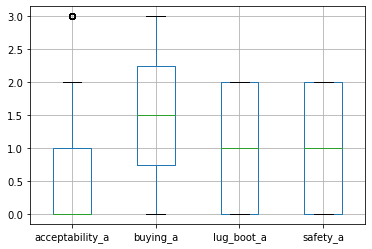

In [172]:
data.boxplot(column=["acceptability_a", "buying_a",'lug_boot_a','safety_a'])

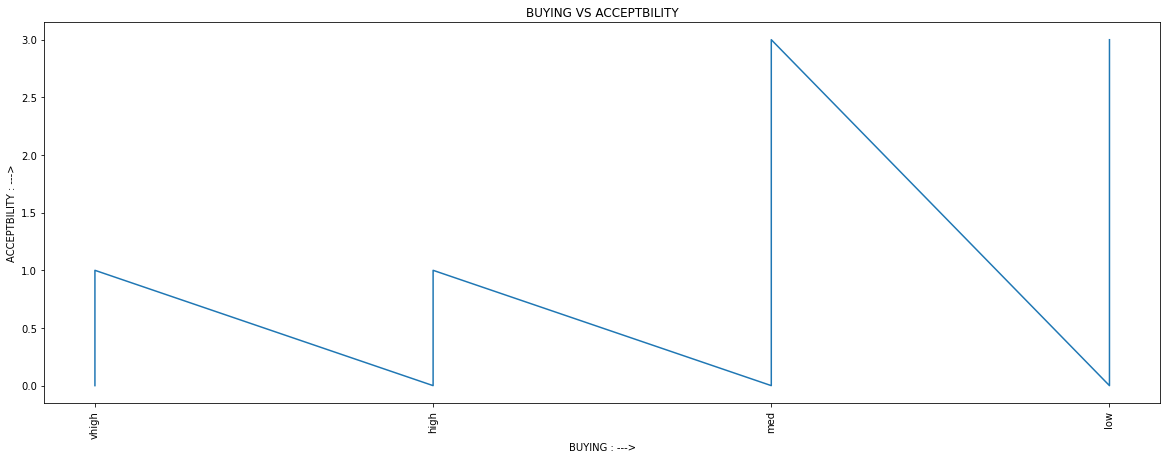

In [173]:
plt.figure(figsize = (20,7))
plt.plot(data["buying"], data["acceptability_a"])
plt.xticks(rotation = 90)
plt.xlabel("BUYING : --->")
plt.ylabel("ACCEPTBILITY : --->")
plt.title("BUYING VS ACCEPTBILITY")
plt.show()

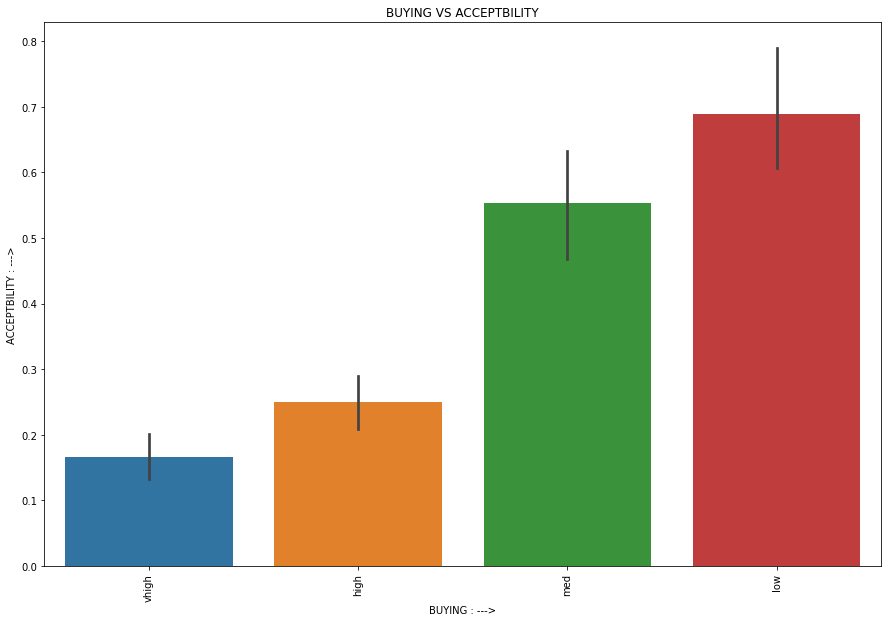

In [174]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x=data["buying"],y=data["acceptability_a"])
plt.xticks(rotation = 90)
plt.xlabel("BUYING : --->")
plt.ylabel("ACCEPTBILITY : --->")
plt.title("BUYING VS ACCEPTBILITY")
plt.show()

##### 4. Split the data into training set and testing set.  Perform 10-fold cross validation.
##### Training Data:
###### 5. Train a Logistic regression model for the dataset. 
###### 6. Display the coefficients and form the logistic regression equation. 

###### Performed 10-fold cross validation and found each fold accuracy and average accuracy

In [175]:
X = np.array(data['maint_a']).reshape((-1,1))
Y = np.array(data['acceptability_a'])
print("\nACCEPTABILITY ARRAY : ",y)
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index],X[test_index]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('\nACCURACY OF EACH FOLD - {}\n'.format(acc_score))
print('AVERAGE ACCURACY : {}'.format(avg_acc_score))


ACCEPTABILITY ARRAY :  [0 0 0 ... 0 2 3]

ACCURACY OF EACH FOLD - [1.0, 0.7687861271676301, 0.815028901734104, 0.7341040462427746, 0.6416184971098265, 0.6936416184971098, 0.5838150289017341, 0.6242774566473989, 0.5872093023255814, 0.5523255813953488]

AVERAGE ACCURACY : 0.7000806560021509


X_TEST :
 [[3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]

Y_TEST :  [0 1 2 0 1 2 0 1 2 0]

COEFFICIENT/SLOPE :  [0.]

INTERCEPT :  0.9


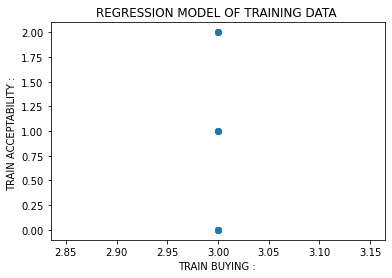

In [176]:
x_train = np.array(data['buying_a'].head(10)).reshape((-1,1))
y_train = np.array(data['safety_a'].head(10))
model=LinearRegression().fit(x_train,y_train)
print("X_TEST :\n",x_train)
print("\nY_TEST : ",y_train)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TRAINING DATA ')
plt.xlabel('TRAIN BUYING : ')
plt.ylabel('TRAIN ACCEPTABILITY : ')
plt.plot(x_train, y_train,'o')
plt.plot(x_train, model.coef_*x_train + model.intercept_)
plt.show()

##### Test Data:
###### 5. Train a Logistic regression model for the dataset. 
###### 6. Display the coefficients and form the logistic regression equation. 

X_TEST :
 [[3]
 [3]
 [3]
 ...
 [0]
 [0]
 [0]]

Y_TEST :  [0 0 0 ... 0 2 3]

COEFFICIENT/SLOPE :  [-0.18726852]

INTERCEPT :  0.695833333333333


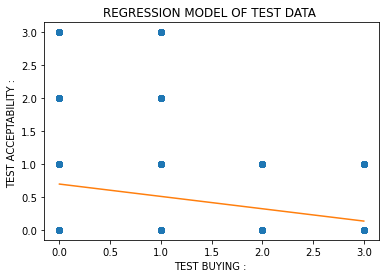

In [177]:
Splitx = np.array_split(data['buying_a'],1)
Splity = np.array_split(data['acceptability_a'],1)
x_test1 = np.array(Splitx[0]).reshape((-1,1))
y_test1 = np.array(Splity[0])
x_test1.reshape(-1,1)
model=LinearRegression().fit(x_test1,y_test1)
print("X_TEST :\n",x_test1)
print("\nY_TEST : ",y_test1)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TEST DATA ')
plt.xlabel('TEST BUYING : ')
plt.ylabel('TEST ACCEPTABILITY : ')
plt.plot(x_test1, y_test1,'o')
plt.plot(x_test1, model.coef_*x_test1 + model.intercept_)
plt.show()

X_TEST :
 [[3]
 [3]
 [3]
 ...
 [0]
 [0]
 [0]]

Y_TEST :  [3 3 3 ... 0 0 0]

COEFFICIENT/SLOPE :  [1.5441083e-17]

INTERCEPT :  1.5


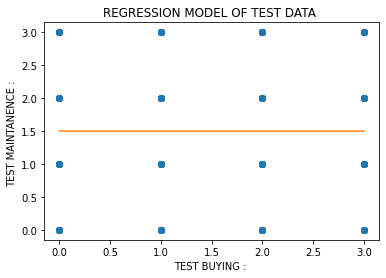

In [178]:
Splitx = np.array_split(data['buying_a'],1)
Splity = np.array_split(data['maint_a'],1)
x_test1 = np.array(Splitx[0]).reshape((-1,1))
y_test1 = np.array(Splity[0])
x_test1.reshape(-1,1)
model=LinearRegression().fit(x_test1,y_test1)
print("X_TEST :\n",x_test1)
print("\nY_TEST : ",y_test1)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TEST DATA ')
plt.xlabel('TEST BUYING : ')
plt.ylabel('TEST MAINTANENCE : ')
plt.plot(x_test1, y_test1,'o')
plt.plot(x_test1, model.coef_*x_test1 + model.intercept_)
plt.show()

X_TEST :
 [[3]
 [3]
 [3]
 ...
 [0]
 [0]
 [0]]

Y_TEST :  [0 0 0 ... 2 2 2]

COEFFICIENT/SLOPE :  [-4.30381617e-19]

INTERCEPT :  1.0


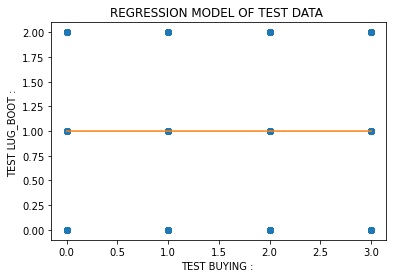

In [179]:
Splitx = np.array_split(data['buying_a'],1)
Splity = np.array_split(data['lug_boot_a'],1)
x_test1 = np.array(Splitx[0]).reshape((-1,1))
y_test1 = np.array(Splity[0])
x_test1.reshape(-1,1)
model=LinearRegression().fit(x_test1,y_test1)
print("X_TEST :\n",x_test1)
print("\nY_TEST : ",y_test1)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TEST DATA ')
plt.xlabel('TEST BUYING : ')
plt.ylabel('TEST LUG_BOOT : ')
plt.plot(x_test1, y_test1,'o')
plt.plot(x_test1, model.coef_*x_test1 + model.intercept_)
plt.show()

##### 7 Compute the accuracy and confusion matrix. 

###### ACCURACY : 

[[3]
 [3]
 [3]
 ...
 [0]
 [0]
 [0]]
[0 0 0 ... 0 2 3]
[1. 1. 1. ... 1. 1. 1.]

CONFUSION MATRIX (2D) : 
 [[   0 1210    0    0]
 [   0  384    0    0]
 [   0   69    0    0]
 [   0   65    0    0]]

CONFUSION MATRIX CLASSIFICATION REPORT INCLUDE ALL ATTRIBUTES OF CM : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1210
           1       0.22      1.00      0.36       384
           2       0.00      0.00      0.00        69
           3       0.00      0.00      0.00        65

    accuracy                           0.22      1728
   macro avg       0.06      0.25      0.09      1728
weighted avg       0.05      0.22      0.08      1728


CONFUSION MATRIX GRAPH:



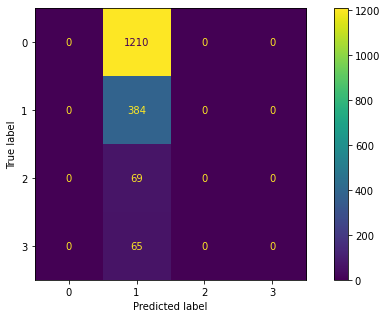

In [180]:
Splitx = np.array_split(data['buying_a'],1)
Splity = np.array_split(data['acceptability_a'],1)
x_rest = np.array(Splitx[0]).reshape((-1,1))
print(x_rest)
y_true = np.array(Splity[0])
print(y_true)
y_pred = np.array((model.predict(x_rest)))
y_pred = y_pred.round(decimals=0)
print(y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_true, y_pred)
print("\nCONFUSION MATRIX (2D) : \n",cm)
#tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
#print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred)
print('\nCONFUSION MATRIX CLASSIFICATION REPORT INCLUDE ALL ATTRIBUTES OF CM : \n',matrix)
print("\nCONFUSION MATRIX GRAPH:\n")
cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax)

[[3]
 [3]
 [3]
 ...
 [0]
 [0]
 [0]]
[0 0 0 ... 2 2 2]
[1. 1. 1. ... 1. 1. 1.]

CONFUSION MATRIX (2D) : 
 [[  0 576   0]
 [  0 576   0]
 [  0 576   0]]

CONFUSION MATRIX CLASSIFICATION REPORT INCLUDE ALL ATTRIBUTES OF CM : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       576
           1       0.33      1.00      0.50       576
           2       0.00      0.00      0.00       576

    accuracy                           0.33      1728
   macro avg       0.11      0.33      0.17      1728
weighted avg       0.11      0.33      0.17      1728


CONFUSION MATRIX GRAPH:



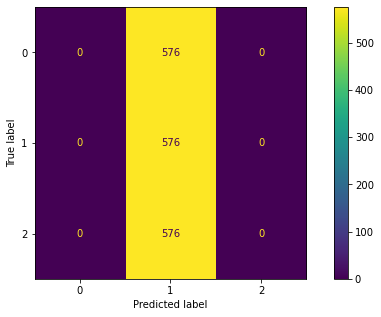

In [181]:
Splitx = np.array_split(data['buying_a'],1)
Splity = np.array_split(data['lug_boot_a'],1)
x_rest = np.array(Splitx[0]).reshape((-1,1))
print(x_rest)
y_true = np.array(Splity[0])
print(y_true)
y_pred = np.array((model.predict(x_rest)))
y_pred = y_pred.round(decimals=0)
print(y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_true, y_pred)
print("\nCONFUSION MATRIX (2D) : \n",cm)
#tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
#print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred)
print('\nCONFUSION MATRIX CLASSIFICATION REPORT INCLUDE ALL ATTRIBUTES OF CM : \n',matrix)
print("\nCONFUSION MATRIX GRAPH:\n")
cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax)

##### 8 Display the correlation between all the attributes. 

In [182]:
x_test1 = np.array(data['buying_a'])
y_test1 = np.array(data['acceptability_a'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR BUYING AND ACCEPTABILITY : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR BUYING AND ACCEPTABILITY : 

 [[ 1.        -0.2827504]
 [-0.2827504  1.       ]]


In [183]:
x_test1 = np.array(data['buying_a'])
y_test1 = np.array(data['maint_a'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR BUYING AND MAINTANENCE : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR BUYING AND MAINTANENCE : 

 [[1. 0.]
 [0. 1.]]


In [184]:
x_test1 = np.array(data['buying_a'])
y_test1 = np.array(data['lug_boot_a'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR BUYING AND LUG BOOT : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR BUYING AND LUG BOOT : 

 [[1. 0.]
 [0. 1.]]


In [185]:
x_test1 = np.array(data['buying_a'])
y_test1 = np.array(data['safety_a'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR BUYING AND SAFETY : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR BUYING AND SAFETY : 

 [[1. 0.]
 [0. 1.]]


### THANK YOU